<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.2.2 

## Statistical Proof

### Part 1: Student's t-Test

The *t*-test is probably the most used statistical test. It measures the likelihood that a sample belongs to a given distribution, and incorporates a correction for the finite size of the sample.

#### Using the t-test to compare two means

Here, suppose we have two sets of measurements and we want to know if they both came from the same distribution.

For example, in [this](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data) dataset these could be age of house in one group and median value of house in another group, and we are testing the null hypothesis that there is no difference between the two groups.

#### Collect Data

You can find the original data [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data).

Data dictionary is available [here](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html).

Data Dictionary
There are 14 attributes in each case of the dataset. They are:

    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

In [3]:
# Head
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
# Shape
data.shape

(506, 14)

##### 1. Plot Histogram of `RM`

DescribeResult(nobs=506, minmax=(3.561, 8.78), mean=6.284634387351779, variance=0.49367085022110907, skewness=0.40241466802496245, kurtosis=1.8610269725310244)

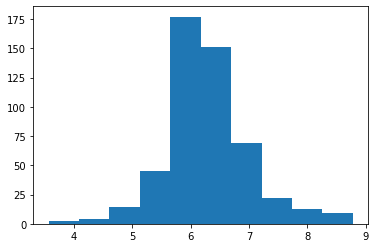

In [7]:
#  ANSWER
plt.hist(data.RM)
stats.describe(data['RM'])

##### 2. Plot Histogram of `MEDV`

DescribeResult(nobs=506, minmax=(5.0, 50.0), mean=22.532806324110677, variance=84.58672359409856, skewness=1.104810822864635, kurtosis=1.4686287722747462)

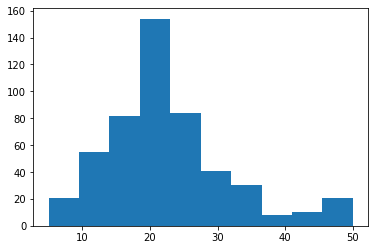

In [8]:
# ANSWER
plt.hist(data.MEDV)
stats.describe(data['MEDV'])

##### 3.A Draw Scatter Plot of `RM` & `MEDV`

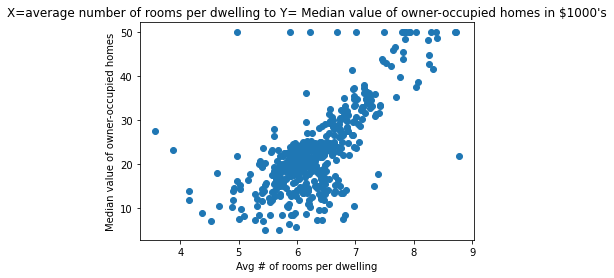

In [11]:
# ANSWER
plt.scatter(data.RM,data.MEDV)
plt.title("X=average number of rooms per dwelling to Y= Median value of owner-occupied homes in $1000's")
plt.xlabel("Avg # of rooms per dwelling")
plt.ylabel("Median value of owner-occupied homes")
plt.show()

##### 3.B Is there any trend? State your observation.

**ANSWER:**: Positive trend. Larger # of rooms equiates to higher median value

We'll be using following steps:

- Define hypothesis
- Set alpha (Let alpha = 0.05)
- Calculate point estimate
- Calculate test statistic
- Find the p-value
- Interpret results

##### 4. Define Hypothesis

Let's assume if `RM` of house is more than 6, they are large house. Other houses are small. Price of houses increases when the `RM` increases.

**ANSWER:**

    H0: There is no difference between distribution of `Large House` & `Small House`
    H1: There is difference between distribution of `Large House` & `Small House`
    
**[Note]** _If you want you can explore the dataset and define different hypothesis._

##### 5. Set alpha (Let alpha = 0.05)

First, we should specify our criterion for statistical significance. Traditionally, we allow for no more than a 1-in-20 chance of a spurious rejection of the null hypothesis:

In [12]:
# ANSWER
alpha=0.05

##### 6. Set Data

Now, let's create two sets of data 
- Large House: House which have more than 6 rooms.
- Small House: House which have less than 6 rooms.

Take sample of 100 house in each dataste.

In [20]:
# ANSWER
#split by room number and take 100 samples
N=100
df_rmgreaterthan6 = data[data["RM"]>6].sample(n=N, random_state=2)
df_rmg6orless = data[data["RM"]<=6].sample(n=N, random_state=2)
print(df_rmgreaterthan6['RM'].min())
print(df_rmgreaterthan6['RM'].max())
print('===============')
print(df_rmg6orless['RM'].min())
print(df_rmg6orless['RM'].max())

6.004
8.725
3.863
5.99


##### 6.A [BONUS] Build histogram for both `Large House` & `Small House`

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE   DIS     RAD  TAX    PTRATIO  B       LSTAT  MEDV
0.00906   90.0  2.97   0     0.400  7.088  20.8  7.3073  1    285.0  15.3     394.72  7.85   32.2    1
0.54050   20.0  3.97   0     0.575  7.470  52.6  2.8720  5    264.0  13.0     390.30  3.16   43.5    1
2.30040   0.0   19.58  0     0.605  6.319  96.1  2.1000  5    403.0  14.7     297.09  11.10  23.8    1
2.01019   0.0   19.58  0     0.605  7.929  96.2  2.0459  5    403.0  14.7     369.30  3.70   50.0    1
1.46336   0.0   19.58  0     0.605  7.489  90.8  1.9709  5    403.0  14.7     374.43  1.73   50.0    1
                                                                                                    ..
0.10612   30.0  4.93   0     0.428  6.095  65.1  6.3361  6    300.0  16.6     394.62  12.40  20.1    1
0.10000   34.0  6.09   0     0.433  6.982  17.7  5.4917  7    329.0  16.1     390.43  4.86   33.1    1
0.08826   0.0   10.81  0     0.413  6.417  6.6   5.2873  4    305.0  19.2     

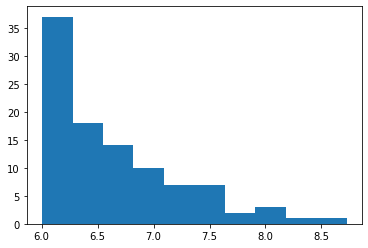

In [22]:
# ANSWER
plt.hist(df_rmgreaterthan6.RM)
#stats.describe(df_rmgreaterthan6['RM'])
df_rmgreaterthan6.value_counts()

CRIM      ZN    INDUS  CHAS  NOX    RM     AGE    DIS     RAD  TAX    PTRATIO  B       LSTAT  MEDV
0.01360   75.0  4.00   0     0.410  5.888  47.6   7.3197  3    469.0  21.1     396.90  14.80  18.9    1
4.66883   0.0   18.10  0     0.713  5.976  87.9   2.5806  24   666.0  20.2     10.48   19.01  12.7    1
11.57790  0.0   18.10  0     0.700  5.036  97.0   1.7700  24   666.0  20.2     396.90  25.68  9.7     1
9.91655   0.0   18.10  0     0.693  5.852  77.8   1.5004  24   666.0  20.2     338.16  29.97  6.3     1
8.79212   0.0   18.10  0     0.584  5.565  70.6   2.0635  24   666.0  20.2     3.65    17.16  11.7    1
                                                                                                     ..
0.21719   0.0   10.59  1     0.489  5.807  53.8   3.6526  4    277.0  18.6     390.94  16.03  22.4    1
0.21124   12.5  7.87   0     0.524  5.631  100.0  6.0821  5    311.0  15.2     386.63  29.93  16.5    1
0.20746   0.0   27.74  0     0.609  5.093  98.0   1.8226  4    711.0 

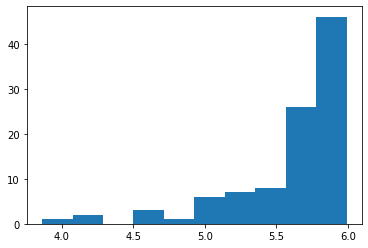

In [23]:
plt.hist(df_rmg6orless.RM)
#stats.describe(df_rmgreaterthan6['RM'])
df_rmg6orless.value_counts()

##### 7. Calculate Variance

In [24]:
a=df_rmgreaterthan6['RM']
b=df_rmg6orless['RM']

Calculate variance for both samples.

In [26]:
# ANSWER
var_a=a.var(ddof=1)
var_b=b.var(ddof=1)
print(var_a)
print(var_b)


0.3444206804040405
0.18831508929292926


##### 8. Calculate Standard Deviation


Because we are dealing with two samples we need to compute the joint standard deviation. 

Here sp is the pooled standard deviation for n = n1 = n2 and s^2
X1 and s^2 X2 are the unbiased estimators of the variances of the two samples.

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f63e99c30c01445668ea2cce9832da0f6810cb4b)

In [27]:
# ANSWER
#to get standard deviation
s=np.sqrt((var_a+var_b)/2)
print(s)

0.5161084041637811


##### 9. Calculate test statistic

The *t*-statistic depends on the difference between the sample means and their joint standard deviation:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/070d365e1b347ea5f83f0147043868fa120b6646)


In [34]:
# ANSWER
#calculate the t-statistic
t=(a.mean() - b.mean())/ (s*(2/ (np.sqrt(len(a))) +(s/(np.sqrt(len(b))))))
print(t)
print(a.mean())
print(b.mean())

8.040445921523341
6.648079999999998
5.60396


##### 10. Calculate Degree of Freedom

The number of degrees of freedom is the total number of samples (here, this is N from each set) minus the number of statistics in the computation (1 for each sample mean):

In [41]:
# ANSWER
##degrees of freedom ie ddof
df = len(a) - 2 + len(b)-2
df

196

##### 11. Find the p-value

Now we can compute the probability of the above *t*-statistic from the cumulative density function:

> stats.t.cdf

> p_value = 1 - cdf(t) 

In [35]:
# ANSWER
##compare with the critical t-value

#p-value after comparison with the t
if (t>0):
    p = 1 - stats.t.cdf(t,df=df)
else:
    p = stats.t.cdf(t,df=df)

In [36]:
print("t= " +str(t))
print("p= " +str(2*p))

t= 8.040445921523341
p= 8.304468224196171e-14


#### Interpret results

##### 12. Write a Function to Test Significance of `p_value`

Write a funtion which will take p_value and alpha as input. If p_value < alpha, print reject null hypothesis message. Otherwise print a fail to reject null hypothesis message. 

In [37]:
# ANSWER
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
    else:
        print("Our test is inconclusive.")

##### 13. [Bonus] Write a function to calculate t, p_value from two samples.

Calculate the T-test for the means of *two independent* samples of scores.

This is a two-sided test for the null hypothesis that 2 independent samples
have identical average (expected) values.

In [ ]:
# ANSWER

#### Use `Stats` Package

##### 14. Calculate the T-test for the means of *two independent* samples of scores

using following method of stats calculate the T-test for the means of two independent samples of scores.



In [39]:
# ANSWER
# ANSWER
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

print_sig(p2, alpha)

t = 14.305218175408834
p = 2.404935847419616e-32
We reject our null hypothesis.




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



